# 1. Application Program Interfaces (APIs)
APIs allow computers to obtain data from networked databases and web APIs are a valuable way to obtain chemical data
## 1.1: Brief Overview of APIs
We will use Application Program Interfaces (APIs) throughout this course as they enable software programs to communicate with each other. The API defines a set of rules that allow the two programs to communicate with each other, and when that communication involves external data structures the API defines:

 **1. Endpoint (Exposes Data)**
   - The URL where the API listens.
   - Example: `https://query.wikidata.org/sparql`

 **2. Request/Response Model (How Data is Sent and Received)**
   - Defines the protocol and request method.
   - **REST APIs**: `GET`, `POST` over HTTP.
   - **SPARQL APIs**: SPARQL Query over HTTP (`GET`/`POST`).
   - **Database APIs**: SQL queries over TCP/IP.

 **3. Data Format (How Data is Structured)**
   - **REST APIs**: JSON, XML, CSV.
   - **SPARQL APIs**: SPARQL-JSON, RDF/XML, Turtle, N-Triples.
   - **Databases**: Tabular data (Relational Tables).
   - **GraphQL APIs**: JSON (Custom queries).

## 1.2: Overview of API Architectures

APIs generally follow different architectures, but the most relevant for chemical data retrieval include:

### RESTful APIs (Representational State Transfer)
   - The most common API architecture for chemical databases.
   - Work with SQL and NoSQL Databases
   - Uses standard HTTP methods:
     - `GET`: Retrieve data
     - `POST`: Send data
     - `PUT`: Update data
     - `DELETE`: Remove data
   - Data is typically returned in JSON, XML, or CSV formats.
   - Example: **PubChem REST API**

### SOAP APIs (Simple Object Access Protocol)
   - Older, more rigid format using XML-based requests.
   - Less common in modern web services but still used in large, legacy systems.

### GraphQL APIs
   - Mostly work with NoSQL Databases
   - Allows users to request specific fields instead of predefined responses.
   - More flexible than REST but less common in chemical informatics.

### SPARQL Endpoints
   - Work with RDF/Triple Stores
   - Used for querying structured chemical databases (e.g., **ChEMBL**).
   - Based on semantic web principles.

---

## 1.3 Chemical Databases with RESTful APIs
| Database | Nature of Data | API Access |
|----------|---------------|------------|
| [PubChem](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest) | Chemical compounds, properties, bioactivity | [PUG REST API](https://pubchem.ncbi.nlm.nih.gov/docs/pug-rest) |
| [ChEMBL](https://www.ebi.ac.uk/chembl/) | Bioactive molecules, drug-like properties | [REST API](https://www.ebi.ac.uk/chembl/api/data/docs) |
| [ChemSpider](http://www.chemspider.com/) | Chemical structures, spectral data, identifiers | [API Access](http://www.chemspider.com/AboutServices.aspx) |
| [Cactus NCI Resolver](https://cactus.nci.nih.gov/chemical/structure) | Structure-based identifier resolution | [REST API](https://cactus.nci.nih.gov/chemical/structure) |
| [RCSB PDB](https://www.rcsb.org/) | Protein structures, small molecule interactions | [REST API](https://data.rcsb.org/redoc/) |
| [Unichem](https://www.ebi.ac.uk/unichem/) | Cross-references between chemical databases | [REST API](https://www.ebi.ac.uk/unichem/rest) |
| [Chemical Translation Service (CTS)](https://cts.fiehnlab.ucdavis.edu/) | Chemical identifier conversion | [API Access](https://cts.fiehnlab.ucdavis.edu/static/swagger-ui/index.html) |

## 1.4 Chemical Databases with SPARQL Endpoints
| Database | Nature of Data | SPARQL Endpoint |
|----------|---------------|-----------------|
| [ChEMBL](https://www.ebi.ac.uk/chembl/) | Bioactive molecules, drug discovery | [SPARQL Endpoint](https://www.ebi.ac.uk/rdf/services/chembl/sparql) |
| [Bio2RDF DrugBank](http://drugbank.bio2rdf.org/) | Drugs, mechanisms, metabolism | [SPARQL Endpoint](http://drugbank.bio2rdf.org/sparql) |
| [RDF ChEBI](https://www.ebi.ac.uk/chebi/) | Molecular entities, biological roles | [SPARQL Endpoint](https://www.ebi.ac.uk/rdf/services/chebi/sparql) |
| [WikiPathways](https://www.wikipathways.org/) | Metabolic and signaling pathways | [SPARQL Endpoint](https://sparql.wikipathways.org/) |
| [Uniprot](https://sparql.uniprot.org/) | Protein sequence and functional information | [SPARQL Endpoint](https://sparql.uniprot.org/) |
| [Open PHACTS](https://www.openphacts.org/) | Drug discovery, pharmacology data | [SPARQL Endpoint](https://www.openphacts.org/2-uncategorised/123-spaql-endpoints) |


# 2. Requests Module
The **`requests`** module is a popular Python library for making **HTTP requests** to interact with web services and REST APIs. It simplifies sending **GET**, **POST**, **PUT**, and **DELETE** requests while handling **cookies, authentication, headers, and timeouts**.

## 2.1: Installing `requests` from conda-forge
To install `requests` using Conda, run:

```bash
conda activate YourEnvironmentYouWantToUse
conda install -c conda-forge requests
```
To verify the installation:
```python
import requests
print(requests.__version__)
```

## 2.2: HTTP Request Methods
These functions are part of the `requests` module and are used to **initiate an HTTP request**. When you call one of these methods (like `get`, `post`, etc.), you’re instructing your program to communicate with a web API.
| Method | Description |
|--------|-------------|
| `requests.get(url, params={}, headers={})` | Sends a GET request (retrieves data). |
| `requests.post(url, data={}, json={}, headers={})` | Sends a POST request (submits data). |
| `requests.put(url, data={}, headers={})` | Sends a PUT request (updates data). |
| `requests.patch(url, data={}, headers={})` | Sends a PATCH request (partially updates data). |
| `requests.delete(url, headers={})` | Sends a DELETE request (removes data). |
| `requests.head(url, headers={})` | Sends a HEAD request (retrieves headers only). |
| `requests.options(url, headers={})` | Checks allowed HTTP methods for the given URL. |
| `requests.request(method, url, **kwargs)` | Generic function for sending any HTTP request. |

## 2.3: Response Object Methods

  Once you have a Response object (from calling a request method), these are **functions available on that object**. They help you to **process and interpret the response**.
  
| Method | Description |
|--------|-------------|
| `.json()` | Converts the response body to a JSON object (if applicable). |
| `.raise_for_status()` | Raises an HTTP error if the response contains an error code. |
| `.iter_content(chunk_size=1024)` | Iterates over response data in chunks. |
| `.iter_lines()` | Iterates over response text line by line. |


## 2.4: Response Object Attributes
  These are the **data attributes** of the Response object. They provide direct access to various pieces of information that came back from the server.
| Attribute | Description |
|-----------|-------------|
| `.status_code` | Returns the HTTP response code (e.g., 200, 404). |
| `.text` | Returns the response body as a string. |
| `.content` | Returns the response body as raw bytes. |
| `.headers` | Returns the response headers as a dictionary. |
| `.url` | Returns the final URL (useful for redirects). |
| `.encoding` | Returns or sets the response text encoding. |
| `.cookies` | Returns cookies from the response. |

# 3. PubChem PUG Rest API
Please note that much of this material is adapted from the [first assignment](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics/01%3A_Introduction/1.10%3A_Python_Assignment_1) of the [2019 Cheminformatics OLCC](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics).
## 3.1 The Shortest Code
If you click the following two links you will get the formula and molecular weight of water
- [https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/txt](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularFormula/txt)
- [https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularWeight/txt](https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/water/property/MolecularWeight/txt)
With the requests module we can perform the same operation.

```python
import requests
ethanol_MW = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/ethanol/property/MolecularWeight/txt')
print(ethanol_MW.text)
```

In [ ]:
import requests
ethanol_MW = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/ethanol/property/MolecularWeight/txt')
print(ethanol_MW.text)

## 3.2 Formulating PUG REST request URLs using variables
The URL can be broken into 4 components
- PROLOG - Common to all PUG REST requests
- INPUT - Identifiers of interest
- OPERATION - What to do with the input
- OUTPUT - Desired Output Format

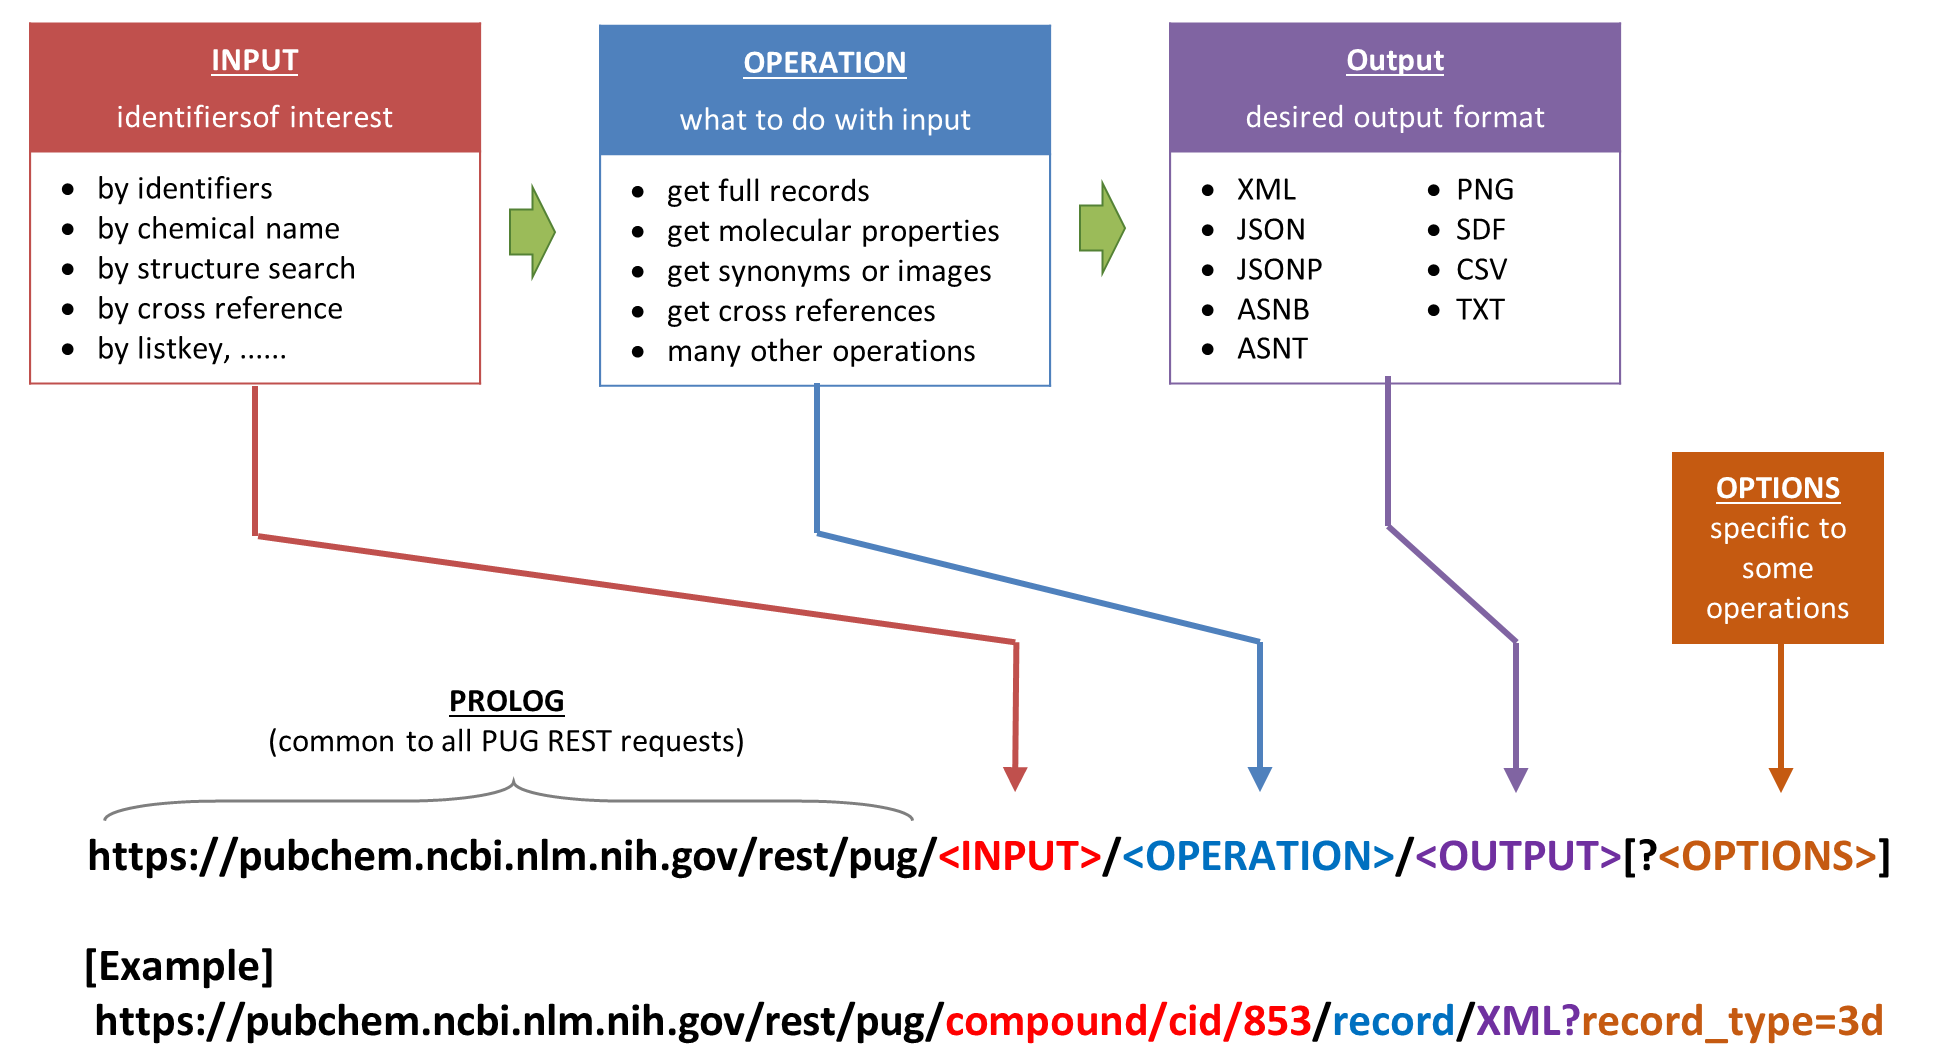

This can be encoded into four different variables (`pugrest`, `pugin`, `pugoper`, `pugout`) and combined into a new variable `url`.  

```python
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/name/water"
pugoper = "property/MolecularFormula"
pugout  = "txt"

url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)
```


In [ ]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/name/water"
pugoper = "property/MolecularFormula"
pugout  = "txt"

url     = pugrest + '/' + pugin + '/' + pugoper + '/' + pugout
print(url)

As these are strings we can use the join() function on a list of the variables where the "/" character is the separator
```python
url = "/".join( [pugrest, pugin, pugoper, pugout] )
print(url)
'''

In [ ]:
url = "/".join( [pugrest, pugin, pugoper, pugout] )
print(url)

Now that we have the url, we can pass it to the .get function
```python
res = requests.get(url)
print(res.text)
```

In [ ]:
res = requests.get(url)
print(res.text)

## 3.3 Making multiple requests with a loop
Note, the API returns a a string of numeric values and the units were not taken from the api

In [ ]:
names = [ 'cytosine', 'benzene', 'motrin', 'aspirin', 'zolpidem' ]

pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/MolecularWeight"
pugout  = "txt"

for myname in names:    # loop over each element in the "names" list
    
    pugin = "compound/name/" + myname
    
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    print(myname, ":", res.text.rstrip(),'g/mol', type(myname))

    

**Warning:** When you make a lot of programmatic access requests using a loop, you should limit your request rate to or below **five requests per second**.  Please read the following document to learn more about PubChem's usage policies:
https://pubchemdocs.ncbi.nlm.nih.gov/programmatic-access$_RequestVolumeLimitations<br>
**Violation of usage policies** may result in the user being **temporarily blocked** from accessing PubChem (or NCBI) resources**
In the for-loop example above, we have only five input chemical names to process, so it is not likely to violate the five-requests-per-second limit.  However, if you have thousands of names to process, the above code will exceed the limit (considering that this kind of requests usually finish very quickly).  Therefore, the request rate should be adjusted by using the **`sleep()`** function in the **`time`** module.  For simplicity, let's suppose that you have 12 chemical names to process (in reality, you could have much more to process).

In [ ]:
import requests
import time

names = [ 'water', 'benzene', 'methanol', 'ethene', 'ethanol', \
          'propene','1-propanol', '2-propanol', 'butadiene', '1-butanol', \
          '2-butanol', 'tert-butanol']

pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/CanonicalSMILES"
pugout  = "txt"

for i in range(len(names)):    # loop over each index (position) in the "names" list
    
    pugin = "compound/name/" + names[i]    # names[i] = the ith element in the names list.
    
    url = "/".join( [pugrest, pugin, pugoper, pugout] )
    res = requests.get(url)
    print(names[i], ":", res.text)

    if ( i % 5 == 4 ) :  # the % is the modulo operator and returns the remainder of a calculation (if i = 4, 9, ...)
        time.sleep(1)

There are three things noteworthy in the above example (compared to the previous examples with the five chemical name queries).
- First, the for loop interates from 0 to [`len(names)` − 1], that is, [0, 1, 2, 3, ...,11].
- The variable `i` is used (in `names[i]`) to generate the input part (`pugin`) of the PUG-REST request URL.
- The variable `i` is used (in the `if` sentence) to stop the program for one second for every five requests.

It should be noted that the request volumn limit can be lowered through the dynamic traffic control at times of excessive load (https://pubchemdocs.ncbi.nlm.nih.gov/dynamic-request-throttling).  Throttling information is provided in the HTTP header response, indicating the system-load state and the per-user limits.  Based on this throttling information, the user should moderate the speed at which requests are sent to PubChem.

## 3.4: Getting multiple properties for a compound
All the examples we have seen in this notebook retrieved a single molecular property for a single compound (although we were able to get a desired property for a group of compounds using a for loop).  However, it is possible to get multiple properties for multiple compounds with a single request.

The following example retrieves the hydrogen-bond donor count, hydrogen-bond acceptor count, XLogP, TPSA for 5 compounds (represented by PubChem Compound IDs (CIDs) in a comma-separated values (CSV) format.

In [1]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugin   = "compound/cid/4485,4499,5026,5734,8082"
pugoper = "property/HBondDonorCount,HBondDonorCount,XLogP,TPSA"
pugout  = "csv"

url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
print(url)
print("-" * 30)   # Print "-" 30 times (to print a line for readability)

res = requests.get(url)
print(res.text)

https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/4485,4499,5026,5734,8082/property/HBondDonorCount,HBondDonorCount,XLogP,TPSA/csv
------------------------------


NameError: name 'requests' is not defined

PubChem has a standard time limit of **30 seconds per request**.  When you try to retrieve too many properties for too many compounds with a single request, it can take longer than the 30-second limit and a time-out error will be returned.  Therefore, you may need to split the compound list into smaller chunks and process one chunk at a time.

In [ ]:
cids = [ 443422,  72301,   8082,    4485,    5353740, 5282230, 5282138, 1547484, 941361, 5734,  \
         5494,    5422,    5417,    5290,    5245,    5026,    4746,    4507,    4499,   4497,  \
         4494,    4474,    4418,    4386,    4009,    4008,    3949,    3926,    3878,   3784,  \
         3698,    3547,    3546,    3336,    3333,    3236,    3076,    2585,    2520,   2351,  \
         2312,    2162,    1236,    1234,    292331,  275182,  235244,  108144,  104972, 77157, \
         5942250, 5311217, 4564402, 4715169, 5311501]

chunk_size = 10

if ( len(cids) % chunk_size == 0 ) : # check if total number of cids is divisible by 10 with no remainder
    num_chunks = len(cids) // chunk_size # sets number of chunks
else : # if divide by 10 results in remainder
    num_chunks = len(cids) // chunk_size + 1 # add one more chunk

print("# Number of CIDs:", len(cids) )
print("# Number of chunks:", num_chunks )

In [ ]:
pugrest = "https://pubchem.ncbi.nlm.nih.gov/rest/pug"
pugoper = "property/HBondDonorCount,HBondAcceptorCount,XLogP,TPSA"
pugout  = "csv"

csv = ""   #sets a variable called csv to save the comma separated output

for i in range(num_chunks) : # sets number of requests to number of data chunks as determined above
    
    idx1 = chunk_size * i        # sets a variable for a moving window of cids to start in a data chunk
    idx2 = chunk_size * (i + 1)  # sets a variable for a moving window of cids to end in a data chunk

    pugin = "compound/cid/" + ",".join([ str(x) for x in cids[idx1:idx2] ]) # build pug input for chunks of data
    url = "/".join( [pugrest, pugin, pugoper, pugout] )   # Construct the URL
    
    res = requests.get(url)

    if ( i == 0 ) : # if this is the first request, store result in empty csv variable
        csv = res.text 
    else :          # if this is a subsequent request, add the request to the csv variable adding a new line between chunks
        csv = csv + "\n".join(res.text.split()[1:]) + "\n" 
    
    if (i % 5 == 4):  
        time.sleep(1)

print(csv)

In [ ]:
import requests

# PubChem API URL to fetch properties for benzene (CID = 241)
cid = 241
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight,IsomericSMILES/JSON"

# Make GET request
response = requests.get(url)

# Check response status
if response.status_code == 200:
    data = response.json()  # Parse JSON response
    print(data)
else:
    print("Error:", response.status_code)


Can you identify the data structures returned by the above script?

# 4. PubChem PUG View API
The PUG View API offers a “view” of a compound’s data that mirrors the narrative descriptions on the PubChem website. This includes sections like summaries, descriptions, and other annotations sourced from scientific literature or curated databases. Instead of raw computed values like you get from the PUG API, you get text-based information. 

### Comparing PUG and PUG View

- **PUG API:**  
  - **Data Type:** Computed values, identifiers, molecular properties, etc.  
  - **Format:** Structured numeric data suitable for computational analysis.  
  - **Usage:** Ideal when you need precise, algorithm-derived metrics.

- **PUG View API:**  
  - **Data Type:** Curated, narrative, literature-derived textual information.  
  - **Format:** Human-readable summaries and descriptions.  
  - **Usage:** Best for applications where you want to present users with contextual and descriptive content.

## 4.1: Downloading complete JSON
In this activity we will download the complete json file for benzene

In [2]:
import requests
import json
import os
import re  # For filename sanitization

# Example CID for Benzene
cid = 	241
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/JSON"

# Define the directory structure
pubchem_json_dir = os.path.expanduser("~/data/pubchem_data/full_json")  # Parent directory
os.makedirs(pubchem_json_dir, exist_ok=True)  # Ensure directories exist

# Make GET request
response = requests.get(url)

# Check response status
if response.status_code == 200:
    data = response.json()
    
    # Extract the chemical name (title)
    chemical_name = data["Record"]["RecordTitle"].lower()  # Example: "Benzene"
    
    # Sanitize the filename (remove special characters, spaces)
    chemical_name_clean = re.sub(r'[^a-zA-Z0-9_-]', '_', chemical_name)  # Replace special chars with "_"
    
    # Construct the full file path
    filename = f"{chemical_name_clean}.json"
    chemical_json_datapath = os.path.join(pubchem_json_dir, filename)

    # Save JSON data to a file
    with open(chemical_json_datapath, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)
    
    print(f"Data saved to {chemical_json_datapath}")

else:
    print("Error:", response.status_code)


Data saved to /home/rebelford/data/pubchem_data/full_json/benzene.json


Navigate to the folder /data/pubchem_data/full_json/ and open the file benzene.json (you can do this using the file browser of your jupyter lab and then in another browser window open the PubChem [datapage for Benzene](https://pubchem.ncbi.nlm.nih.gov/compound/Benzene), and compare the two

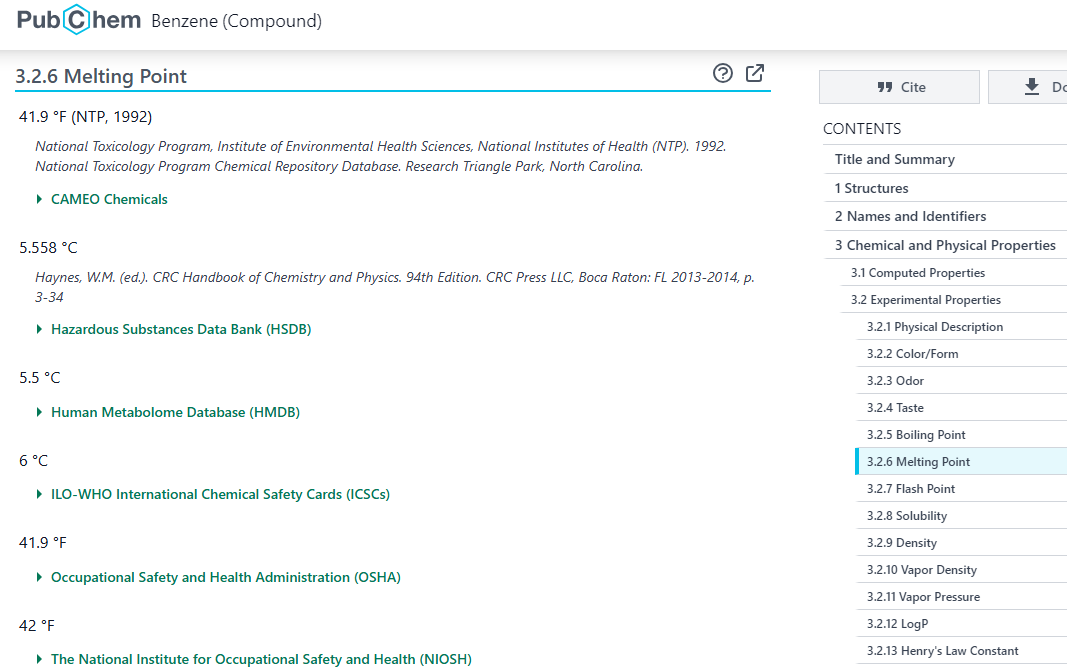

Screenshot of PubChem web interface with melting point data on Benzene

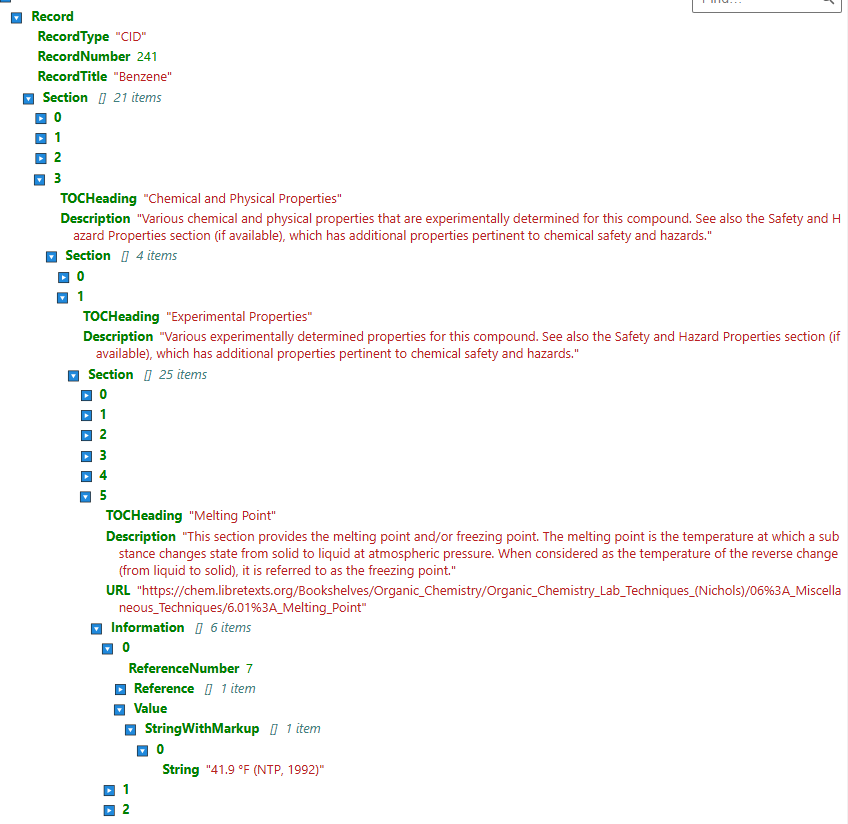

Screen shot showing schema of json file for Benzene that we just downloaded and how to get the first experimental melting point.

## 4.2 Extract Melting Points 
Here we take the json file generated from pug_view for benzene and extract the melting points from the 6 sources.  Note how they have different units.

In [3]:
import json
import os

# Define the path to your JSON file
pubchem_json_dir = os.path.expanduser("~/data/pubchem_data/full_json/")
filename = "benzene.json"  # Replace with your actual filename if different
file_path = os.path.join(pubchem_json_dir, filename)

# Open and load the JSON file
with open(file_path, "r", encoding="utf-8") as json_file:
    data = json.load(json_file)


# Navigate the JSON structure to find "Melting Point" under "Experimental Properties"
melting_points = []

for section in data["Record"]["Section"]:
    if section["TOCHeading"] == "Chemical and Physical Properties":
        for subsection in section.get("Section", []):
            if subsection["TOCHeading"] == "Experimental Properties":
                for prop_section in subsection.get("Section", []):
                    if prop_section["TOCHeading"] == "Melting Point":
                        for info in prop_section.get("Information", []):
                            if "Value" in info and "StringWithMarkup" in info["Value"]:
                                melting_points.append(info["Value"]["StringWithMarkup"][0]["String"])


# Print extracted melting point values
if melting_points:
    print("\nMelting Points (All Available Sources):")
for i, mp in enumerate(melting_points, 1):
        print(f"{i}. {mp}")


Melting Points (All Available Sources):
1. 41.9 °F (NTP, 1992)
2. 5.558 °C
3. 5.5 °C
4. 6 °C
5. 41.9 °F
6. 42 °F


## 4.3 Create Pandas DataFrame of Experimental Properties

In [4]:
import requests
import json
import os
import pandas as pd


# Define the path to your JSON file
pubchem_json_dir = os.path.expanduser("~/data/pubchem_data/full_json/")
filename = "benzene.json"  # Replace with your actual filename if different
file_path = os.path.join(pubchem_json_dir, filename)

# Open and load the JSON file
with open(file_path, "r", encoding="utf-8") as json_file:
    data = json.load(json_file)

# Dictionary to store extracted data
property_data = {}

# Navigate the JSON structure to find "Experimental Properties"
for section in data["Record"]["Section"]:
    if section["TOCHeading"] == "Chemical and Physical Properties":
        for subsection in section.get("Section", []):
            if subsection["TOCHeading"] == "Experimental Properties":
                for prop_section in subsection.get("Section", []):
                    property_name = prop_section["TOCHeading"]
                    values = []
                        
                    for info in prop_section.get("Information", []):
                        if "Value" in info and "StringWithMarkup" in info["Value"]:
                            values.append(info["Value"]["StringWithMarkup"][0]["String"])

 
                    # Store in dictionary
                    property_data[property_name] = values

# Convert extracted data to Pandas DataFrame
df = pd.DataFrame.from_dict(property_data, orient="index").transpose()

# Display the DataFrame in Jupyter Notebook
from IPython.display import display
display(df)

# Save DataFrame to CSV file
csv_path = os.path.expanduser(f"~/data/pubchem_data/cid_{cid}_experimental_properties.csv")
df.to_csv(csv_path, index=False)

print(f"Experimental properties saved to CSV: {csv_path}")


                               

,Physical Description,Color/Form,Odor,Taste,Boiling Point,Melting Point,Flash Point,Solubility,Density,Vapor Density,...,Viscosity,Heat of Combustion,Heat of Vaporization,Surface Tension,Ionization Potential,Odor Threshold,Refractive Index,Relative Evaporation Rate,Kovats Retention Index,Other Experimental Properties
0,Benzene appears as a clear colorless liquid wi...,"Clear, colorless liquid",Aromatic odor,Taste threshold in water is 0.5-4.5 mg/l.,"176.2 °F at 760 mmHg (NTP, 1992)","41.9 °F (NTP, 1992)","12 °F (NTP, 1992)","1 to 5 mg/mL at 64 °F (NTP, 1992)","0.879 at 68 °F (USCG, 1999) - Less dense than ...","2.77 (NTP, 1992) - Heavier than air; will sink...",...,0.604 mPa.s at 25 °C,-3267.6 kJ/mol (liquid),33.83 kJ/mol at 25 °C,28.22 mN/m at 25 °C,9.24 eV,Odor Threshold Low: 34.0 [mmHg],Index of refraction: 1.5011 at 20 °C/D,2.8 (Ether = 1),None,Conversion factors: 1 mg/cu m = 0.31 ppm; 1 pp...
1,"Gas or Vapor, Liquid; Liquid",Orthorhombic prisms or liquid,Gasoline-like odor; rather pleasant aromatic o...,None,80.08 °C,5.558 °C,12 °F,"In water, 1.79X10+3 mg/L at 25 °C",0.8756 g/cu cm at 20 °C,2.8 (Air = 1),...,None,None,None,None,9.24 eV,4.68 PPM,None,None,None,Blood/air partition coefficient is 7.8
2,Colorless to light-yellow liquid with an aroma...,Colorless to light-yellow liquid [Note: A soli...,None,None,80.00 to 81.00 °C. @ 760.00 mm Hg,5.5 °C,12 °F (-11 °C) Closed Cup,"Miscible with alcohol, chloroform, ether, carb...",SPECIFIC DISPERSION 189.6; DENSITY OF SATURATE...,Relative vapor density (air = 1): 2.7,...,None,None,None,None,None,"In air: 4.9 mg/cu m (characteristic odor), in ...",None,None,None,Sublimes -30 to 5 °C
3,Liquid,None,None,None,80 °C,6 °C,-11.0 °C (12.2 °F) (Closed cup),"Miscible with ethanol, ethyl ether, acetone, c...",Relative density (water = 1): 0.88,2.77,...,None,None,None,None,None,distinct odor: 310 mg/cu m= 90 ppm,None,None,None,Heat of fusion = 9.87 KJ/mol
4,COLOURLESS LIQUID WITH CHARACTERISTIC ODOUR.,None,None,None,176.2 °F,41.9 °F,-11 °C c.c.,1.79 mg/mL,0.88,None,...,None,None,None,None,None,human odor perception: 3.0 mg/cu m=1 ppm,None,None,None,For more Other Experimental Properties (Comple...
5,Highly flammable colorless to light-yellow liq...,None,None,None,176 °F,42 °F,12 °F,"Solubility in water, g/100ml at 25 °C: 0.18",0.88,None,...,None,None,None,None,None,None,None,None,None,None
6,Colorless to light-yellow liquid with an aroma...,None,None,None,None,None,12 °F,0.07%,None,None,...,None,None,None,None,None,None,None,None,None,None
7,"Clear, colorless to light yellow liquid at roo...",None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Experimental properties saved to CSV: /home/rebelford/data/pubchem_data/cid_241_experimental_properties.csv


## 4.4 Create a DataBase with 8 tables
In this activity we will download and save a json file for the smallest 8 linear alkanes, then convert it to a dataframe and save each as a csv file,  and then combine them into a database, with each alkane having a separate table.

In [4]:
import requests
import json
import os
import pandas as pd
import sqlite3
import time

# Define alkanes and their PubChem CIDs
alkanes = {
    "methane": 297,
    "ethane": 6324,
    "propane": 6334,
    "butane": 7843,
    "pentane": 8003,
    "hexane": 8058,
    "heptane": 8900,
    "octane": 356
}

# Define SQLite database
alkane_properties_db_datapath = os.path.expanduser("~/data/pubchem_data/alkane_properties.db")
os.makedirs(os.path.dirname(alkane_properties_db_datapath), exist_ok=True)

# Connect to SQLite
conn = sqlite3.connect(alkane_properties_db_datapath)
cursor = conn.cursor()

# Create a summary table for all alkanes
cursor.execute("""
CREATE TABLE IF NOT EXISTS alkanes_summary (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    alkane TEXT UNIQUE,
    cid INTEGER,
    FOREIGN KEY(cid) REFERENCES properties(cid)
)
""")


# Iterate through each alkane and fetch data from PubChem
for alkane, cid in alkanes.items():
    print(f"Fetching data for {alkane} (CID: {cid})...")
    
    # PubChem API URL
    url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug_view/data/compound/{cid}/JSON"

    # Send GET request (with delay to avoid hitting API limits)
    response = requests.get(url)
    time.sleep(1)  # Add delay to avoid excessive requests

    if response.status_code == 200:
        data = response.json()

        # Save full JSON file (for debugging)
        json_path = os.path.expanduser(f"~/data/pubchem_data/{alkane}.json")
        with open(json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=4)

        print(f"Data saved to: {json_path}")

        # Extract properties
        property_data = {}
        for section in data["Record"]["Section"]:
            if section["TOCHeading"] == "Chemical and Physical Properties":
                for subsection in section.get("Section", []):
                    if subsection["TOCHeading"] == "Experimental Properties":
                        for prop_section in subsection.get("Section", []):
                            property_name = prop_section["TOCHeading"]
                            values = []
                            for info in prop_section.get("Information", []):
                                if "Value" in info and "StringWithMarkup" in info["Value"]:
                                    values.append(info["Value"]["StringWithMarkup"][0]["String"])
                            
                            # Convert numerical properties to float where possible
                            cleaned_values = []
                            for v in values:
                                try:
                                    num_value = float(v.split()[0])  # Extract first numeric value
                                    cleaned_values.append(num_value)
                                except ValueError:
                                    cleaned_values.append(v)  # Keep as string if conversion fails

                            property_data[property_name] = cleaned_values
        # Convert data to Pandas DataFrame
        df = pd.DataFrame.from_dict(property_data, orient="index").transpose()

        # Save DataFrame as CSV (optional)
        csv_path = os.path.expanduser(f"~/data/pubchem_data/{alkane}_experimental_properties.csv")
        df.to_csv(csv_path, index=False)
        print(f"Experimental properties saved to CSV: {csv_path}")

        # Create SQLite table for this alkane
        create_table_query = f"""
        CREATE TABLE IF NOT EXISTS {alkane} (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            property TEXT,
            value TEXT
        )
        """
        cursor.execute(create_table_query)

        # Insert data into SQLite table
        for prop, values in property_data.items():
            for value in values:
                cursor.execute(f"INSERT INTO {alkane} (property, value) VALUES (?, ?)", (prop, value))

        # Add entry to summary table
        cursor.execute("INSERT OR IGNORE INTO alkanes_summary (alkane, cid) VALUES (?, ?)", (alkane, cid))

        print(f"Data for {alkane} stored in SQLite.")

    else:
        print(f"Error retrieving data for {alkane}: {response.status_code}")

# Commit and close SQLite connection
conn.commit()
conn.close()
print("All data stored successfully in SQLite.")
                            

Fetching data for methane (CID: 297)...
Data saved to: /home/rebelford/data/pubchem_data/methane.json
Experimental properties saved to CSV: /home/rebelford/data/pubchem_data/methane_experimental_properties.csv
Data for methane stored in SQLite.
Fetching data for ethane (CID: 6324)...
Data saved to: /home/rebelford/data/pubchem_data/ethane.json
Experimental properties saved to CSV: /home/rebelford/data/pubchem_data/ethane_experimental_properties.csv
Data for ethane stored in SQLite.
Fetching data for propane (CID: 6334)...
Data saved to: /home/rebelford/data/pubchem_data/propane.json
Experimental properties saved to CSV: /home/rebelford/data/pubchem_data/propane_experimental_properties.csv
Data for propane stored in SQLite.
Fetching data for butane (CID: 7843)...
Data saved to: /home/rebelford/data/pubchem_data/butane.json
Experimental properties saved to CSV: /home/rebelford/data/pubchem_data/butane_experimental_properties.csv
Data for butane stored in SQLite.
Fetching data for pentane

### print df head
Now lets print the head of the dataframe, and note how we lost the units

In [5]:
print(df.head())

                                Physical Description        Color/Form  \
0  N-octane is a colorless liquid with an odor of...  Colorless liquid   
1                               Liquid; Gas or Vapor      Clear liquid   
2  Colorless liquid with a gasoline-like odor; [N...              None   
3                                             Liquid              None   
4       COLOURLESS LIQUID WITH CHARACTERISTIC ODOUR.              None   

            Odor Boiling Point Melting Point Flash Point  \
0  Gasoline-like         258.1         -70.2        56.0   
1           None        125.62        -56.73        56.0   
2           None         125.0         -56.8        72.0   
3           None         126.0         -56.8        13.0   
4           None         258.0         -70.0        56.0   

                                          Solubility  \
0                                            0.00007   
1                       In water, 0.66 mg/L at 25 °C   
2  Soluble in ethyl ether;

### Print database tables

In [6]:
import sqlite3

conn = sqlite3.connect(alkane_properties_db_datapath)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("Tables in the database:", tables)
conn.close()

Tables in the database: [('alkanes_summary',), ('sqlite_sequence',), ('methane',), ('ethane',), ('propane',), ('butane',), ('pentane',), ('hexane',), ('heptane',), ('octane',)]


### Print field details for each table

In [7]:
import sqlite3

# Replace with the actual path to your database file
#db_path = "alkane_properties_db_datapath"
conn = sqlite3.connect(alkane_properties_db_datapath)
cursor = conn.cursor()

# Retrieve the list of tables from sqlite_master
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    # Get information about the table's columns
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    
    if columns:
        print("Fields:")
        for col in columns:
            # col returns: (cid, name, type, notnull, dflt_value, pk)
            cid, name, col_type, notnull, dflt_value, pk = col
            print(f"  - {name} ({col_type})")
    else:
        print("  No column information available.")
    
    print()  # Newline for better separation

conn.close()


Table: alkanes_summary
Fields:
  - id (INTEGER)
  - alkane (TEXT)
  - cid (INTEGER)

Table: sqlite_sequence
Fields:
  - name ()
  - seq ()

Table: methane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: ethane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: propane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: butane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: pentane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: hexane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: heptane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)

Table: octane
Fields:
  - id (INTEGER)
  - property (TEXT)
  - value (TEXT)



### Extract first 15 values of each table

In [8]:
import sqlite3

# Replace with the actual path to your database file
#db_path = "alkane_properties_db_datapath"
conn = sqlite3.connect(alkane_properties_db_datapath)
cursor = conn.cursor()

# Retrieve list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
tables = cursor.fetchall()

for table in tables:
    table_name = table[0]
    print(f"Table: {table_name}")
    
    # Optionally, print column headers:
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns_info = cursor.fetchall()
    if columns_info:
        columns = [col[1] for col in columns_info]  # col[1] is the column name
        print("\t".join(columns))
    
    # Get the first 5 rows
    cursor.execute(f"SELECT * FROM {table_name} LIMIT 15")
    rows = cursor.fetchall()
    
    for row in rows:
        print(row)
    print()  # extra newline for clarity between tables

conn.close()


Table: alkanes_summary
id	alkane	cid
(1, 'methane', 297)
(2, 'ethane', 6324)
(3, 'propane', 6334)
(4, 'butane', 7843)
(5, 'pentane', 8003)
(6, 'hexane', 8058)
(7, 'heptane', 8900)
(8, 'octane', 356)

Table: sqlite_sequence
name	seq
('methane', 114)
('alkanes_summary', 16)
('ethane', 100)
('propane', 148)
('butane', 138)
('pentane', 152)
('hexane', 150)
('heptane', 138)
('octane', 146)

Table: methane
id	property	value
(1, 'Physical Description', 'Methane is a colorless odorless gas. It is also known as marsh gas or methyl hydride. It is easily ignited. The vapors are lighter than air. Under prolonged exposure to fire or intense heat the containers may rupture violently and rocket. It is used in making other chemicals and as a constituent of the fuel, natural gas.')
(2, 'Physical Description', 'Methane is a colorless odorless gas. It is also known as marsh gas or methyl hydride. It is easily ignited. The vapors are lighter than air. Under prolonged exposure to fire or intense heat the c

In [ ]:
import sqlite3


# Connect to SQLite
db_path = os.path.expanduser("~/data/pubchem_data/alkane_properties.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

highest_bp = None
highest_bp_alkane = None

# Loop through each alkane table to find boiling points
for alkane in ["methane", "ethane", "propane", "butane", "pentane", "hexane", "heptane", "octane"]:
    query = f"""
    SELECT value FROM {alkane}
    WHERE property = 'Boiling Point'
    """
    cursor.execute(query)
    boiling_points = cursor.fetchall()

    for bp in boiling_points:
        try:
            bp_value = float(bp[0])  # ✅ No need to split, it's already a float
            if highest_bp is None or bp_value > highest_bp:
                highest_bp = bp_value
                highest_bp_alkane = alkane
        except ValueError:
            pass  # Ignore invalid values

# Display the correct highest boiling point
if highest_bp_alkane:
    print(f"\nThe alkane with the highest boiling point is: {highest_bp_alkane.capitalize()} ({highest_bp})")
else:
    print("No valid boiling point data found.")

# Close connection
conn.close()


### Query each table for boiling points
***Note, without units this data is uesless and needs to be cleaned up!**

In [ ]:
import sqlite3

# Connect to SQLite
db_path = os.path.expanduser("~/data/pubchem_data/alkane_properties.db")
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Check stored boiling points
print("\nStored Boiling Points in SQLite:\n")

for alkane in ["methane", "ethane", "propane", "butane", "pentane", "hexane", "heptane", "octane"]:
    query = f"""
    SELECT property, value FROM {alkane}
    WHERE property = 'Boiling Point'
    """
    cursor.execute(query)
    results = cursor.fetchall()

    print(f"{alkane.capitalize()} Boiling Points:")
    for row in results:
        print(f"  - {row[1]}")  # Should print only numeric values in °C
    print("-" * 40)

# Close connection
conn.close()

The issue is we lost the units

# Acknowledgements
This content was developed with assistance from [Perplexity AI](https://www.perplexity.ai/) and [Chat GPT](https://chatgpt.com/). Multiple queries were made during the Fall 2024 and the Spring 2025.

The PUG-rest API content was borrowed extensively from the [2019 Cheminformatics OLCC LibreTexts](https://chem.libretexts.org/Courses/Intercollegiate_Courses/Cheminformatics) and special acknowledgement goes to Sunghwan Kim for developing the original content.